# Part 2: GAN

11812804 董正

## Task 1: Implementation

This is an implementation for [DCGAN](https://arxiv.org/abs/1511.06434).

![](https://pytorch.org/tutorials/_images/dcgan_generator.png)

References:
- PyTorch Tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
- TensorFlow Tutorial: https://www.tensorflow.org/tutorials/generative/dcgan?hl=zh-cn

### Generator

Five transpose convolution layers to generate a fake image from noises.

In [10]:
from DCGAN import Generator, Discriminator
from torchinfo import summary

generator = Generator(noise_dim=100, hidden_channels_base=128, output_channels=1)

summary(generator, input_size=(1, 100, 1, 1))

Layer (type:depth-idx)                   Output Shape              Param #
Generator                                --                        --
├─Sequential: 1-1                        [1, 1, 64, 64]            --
│    └─ConvTranspose2d: 2-1              [1, 1024, 4, 4]           1,638,400
│    └─BatchNorm2d: 2-2                  [1, 1024, 4, 4]           2,048
│    └─ReLU: 2-3                         [1, 1024, 4, 4]           --
│    └─ConvTranspose2d: 2-4              [1, 512, 8, 8]            8,388,608
│    └─BatchNorm2d: 2-5                  [1, 512, 8, 8]            1,024
│    └─ReLU: 2-6                         [1, 512, 8, 8]            --
│    └─ConvTranspose2d: 2-7              [1, 256, 16, 16]          2,097,152
│    └─BatchNorm2d: 2-8                  [1, 256, 16, 16]          512
│    └─ReLU: 2-9                         [1, 256, 16, 16]          --
│    └─ConvTranspose2d: 2-10             [1, 128, 32, 32]          524,288
│    └─BatchNorm2d: 2-11                 [1, 128, 32

### Discriminator

A CNN for image binary classification.

In [11]:
discriminator = Discriminator(input_channels=1, hidden_channels_base=128)

summary(discriminator, (1, 1, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
Discriminator                            --                        --
├─Sequential: 1-1                        [1, 1, 1, 1]              --
│    └─Conv2d: 2-1                       [1, 128, 32, 32]          2,048
│    └─LeakyReLU: 2-2                    [1, 128, 32, 32]          --
│    └─Conv2d: 2-3                       [1, 256, 16, 16]          524,288
│    └─BatchNorm2d: 2-4                  [1, 256, 16, 16]          512
│    └─LeakyReLU: 2-5                    [1, 256, 16, 16]          --
│    └─Conv2d: 2-6                       [1, 512, 8, 8]            2,097,152
│    └─BatchNorm2d: 2-7                  [1, 512, 8, 8]            1,024
│    └─LeakyReLU: 2-8                    [1, 512, 8, 8]            --
│    └─Conv2d: 2-9                       [1, 1024, 4, 4]           8,388,608
│    └─BatchNorm2d: 2-10                 [1, 1024, 4, 4]           2,048
│    └─LeakyReLU: 2-11                   [1, 1024, 4, 4]

## Task 2: Train

- Discriminator

    DLoss = Loss of predicting real images (label = 1) + Loss of predicting fake images (label = 0)
    1. Predict real images and calculate loss.
    
        $DLoss_{real}=\mathrm{BCE}(\hat y_r, 1)$

    2. Generate random noise that satisfies $N(0, 1)$.
    3. Generate fake images by generator network.
    4. Predict fake images and calculate loss.

        $DLoss_{fake}=\mathrm{BCE}(\hat y_f, 0)$

    5. Sum the losses.

        $DLoss=DLoss_{real}+DLoss_{fake}$

    6. Update parameters.

- Generator

    1. GLoss = Loss of the cases that discriminator cannot recognize fake images

        $GLoss=\mathrm{BCE}(\hat y_f, 1)$

    2. Update parameters.

**Parameter Settings:**

For the network, use the same number of filters as DCGAN, which is already shown in the above `summary(model)` command.

- Latent Dim (Noise Dim): 100
- Learning Rate: 0.0002
- Batch Size: 128
- Max Epochs: 300
- Save Images Interval: 10

Training DCGAN is very time-costing, making it hard to show the process in this notebook. Therefore, I trained it on a server and recorded the logs.

In [13]:
! head -n 30 train.log

2022-05-22 00:39:00.971691 Epoch 10 	Generator Loss = 3.96536 Discriminator Loss = 0.28411 
2022-05-22 00:57:44.314341 Epoch 20 	Generator Loss = 4.17754 Discriminator Loss = 0.34839 
2022-05-22 01:17:10.945575 Epoch 30 	Generator Loss = 4.72768 Discriminator Loss = 0.23825 
2022-05-22 01:35:25.714158 Epoch 40 	Generator Loss = 5.16002 Discriminator Loss = 0.23812 
2022-05-22 01:53:39.703358 Epoch 50 	Generator Loss = 9.44220 Discriminator Loss = 0.00161 
2022-05-22 02:11:51.385317 Epoch 60 	Generator Loss = 52.42364 Discriminator Loss = 0.00000 
2022-05-22 02:29:59.775999 Epoch 70 	Generator Loss = 51.77450 Discriminator Loss = 0.00000 
2022-05-22 02:48:06.576259 Epoch 80 	Generator Loss = 51.07788 Discriminator Loss = 0.00000 
2022-05-22 03:06:11.742733 Epoch 90 	Generator Loss = 49.31922 Discriminator Loss = 0.00000 
2022-05-22 03:24:25.324251 Epoch 100 	Generator Loss = 8.31063 Discriminator Loss = 0.07617 
2022-05-22 03:42:39.566124 Epoch 110 	Generator Loss = 8.41514 Discriminato

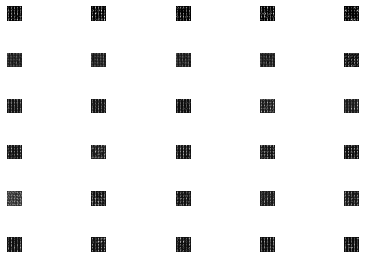

In [33]:
import matplotlib.pyplot as plt

fig, axs=plt.subplots(6, 5)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig.tight_layout()
for i in range(1, 31):
    axs[(i-1)//5][(i-1)%5].set_axis_off()
    img=plt.imread(f"./gen_images/{i*10}.png")
    axs[(i-1)//5][(i-1)%5].imshow(img)
plt.show()